In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(context='notebook', 
sns.set(context='paper', 
        # font_scale=8/8.8,
        style='ticks',
        color_codes=True, 
        rc={'legend.frameon': False})

plt.rcParams['svg.fonttype'] = 'none'
# plt.rc('axes', labelsize=11)
# plt.rc('legend', fontsize=11)


%matplotlib inline

In [2]:
os.chdir("../")
os.getcwd()

'/lustre/eaglefs/projects/rlmolecule/jlaw/projects/crystal-gnn-nfp-0.3-pruning-outliers'

In [16]:
data = pd.read_pickle("/projects/rlmolecule/pstjohn/crystal_inputs/20220603_outliers_removed.p")
data.type.value_counts()

relax    64958
vol      64510
icsd     16409
Name: type, dtype: int64

In [3]:
# trained with relaxed structures, predict with unrelaxed
rel_unrel = pd.read_csv("20220708_icsd_and_battery_novol/predicted_energies.csv.gz")
# trained with unrelaxed structures, predict with unrelaxed
unrel_unrel = pd.read_csv("20220708_icsd_and_unrel_battery_novol/predicted_energies.csv.gz")
unrel_unrel.head(2)

,id,type,composition,num_sites,hit_upper_bound,energyperatom,volperatom,scaled_input_volperatom,set,energy_predicted
0,icsd_085777,icsd,La1O1P1Zn1,8,False,-5.833295,18.131654,1.368655,train,-5.815193
1,icsd_173786,icsd,I3Ti1,8,False,-3.397267,35.943968,1.657735,train,-3.393148


In [4]:
unrel_unrel.set.value_counts()

train               68676
test                 3816
valid                3815
test_composition      631
Name: set, dtype: int64

In [5]:
# TODO make predictions on the unrelaxed structures with the model trained on relaxed


In [6]:
rel_unrel['energy_err'] = (rel_unrel['energyperatom'] - rel_unrel['energy_predicted']).abs()
rel_unrel.groupby(['set', 'type']).energy_err.mean().unstack().round(3)

type,icsd,relax
set,,
test,0.045,0.029
test_composition,0.032,0.038
train,0.025,0.019
valid,0.054,0.030


In [7]:
unrel_unrel['energy_err'] = (unrel_unrel['energyperatom'] - unrel_unrel['energy_predicted']).abs()
unrel_unrel.groupby(['set', 'type']).energy_err.mean().unstack().round(3)

type,icsd,relax
set,,
test,0.053,0.133
test_composition,0.053,0.203
train,0.025,0.038
valid,0.053,0.134


In [8]:
unrel_unrel.sort_values('type', ascending=False, inplace=True)

20220708_icsd_and_unrel_battery_novol/dft_vs_pred.svg


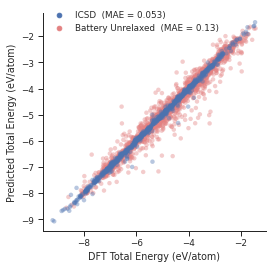

In [31]:
df = unrel_unrel[unrel_unrel.set == "test"]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, aspect='equal', adjustable='datalim')

# artist = dsshow(volumes,
#        ds.Point('volume_predicted', 'volperatom'),
#        ds.count_cat('type'),       
#        cmap='Blues', norm='eq_hist', aspect='equal',
#        x_range=(0, 70), y_range=(0, 70), ax=ax)
g = sns.scatterplot(data=df, x="energyperatom", y="energy_predicted", 
                    hue="type", hue_order=["icsd", "relax"],
                    palette=['C0', '#e38181'],
                    alpha=.4, s=20, linewidth=0,
               )

# ax.legend(loc=(0.05,1))
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.05),
          fancybox=True, shadow=True)
ax.legend_.set_title(None)
# replace labels
new_labels = ['ICSD', 'Battery Unrelaxed']
for t, l in zip(ax.legend_.texts, new_labels):
    data_type = t.get_text()
    mae = (df[df.type == data_type]["energyperatom"] - df[df.type == data_type]["energy_predicted"]).abs().mean()
    new_label = f"{l}  (MAE = {mae:0.2})"
    t.set_text(new_label)
    
    

ax.set_xlabel('DFT Total Energy (eV/atom)')
ax.set_ylabel('Predicted Total Energy (eV/atom)')
# ax.legend(handles=artist.get_legend_elements(), fontsize=13, loc='lower right')
sns.despine()
out_file = "20220708_icsd_and_unrel_battery_novol/dft_vs_pred.svg"
print(out_file)
plt.savefig(out_file, bbox_inches='tight')
plt.savefig(out_file.replace('.svg', '.png'), bbox_inches='tight', dpi=300)

In [10]:
import datashader as ds
from datashader.mpl_ext import dsshow#, alpha_colormap

/tmp/ipykernel_27732/3494204619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.type = df.type.astype('category')


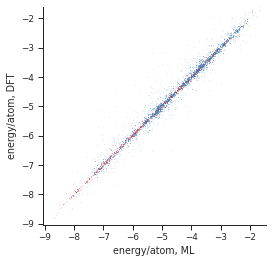

In [11]:
df = unrel_unrel[unrel_unrel.set == "test"]
df.type = df.type.astype('category')
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, aspect='equal', adjustable='datalim')

artist = dsshow(df,
       ds.Point('energy_predicted', 'energyperatom'),
       ds.count_cat('type'),
       cmap='Blues', #norm='eq_hist', aspect='equal',
       # x_range=(0, 70), y_range=(0, 70), 
                ax=ax)
# g = sns.scatterplot(data=df, x="energyperatom", y="energy_predicted", 
#                 hue="type", hue_order=["icsd", "relax"],
#                 alpha=.5, s=20, linewidth=0,
#                )

ax.set_xlabel('energy/atom, ML')
ax.set_ylabel('energy/atom, DFT')
# ax.legend(handles=artist.get_legend_elements(), fontsize=13, loc='lower right')
sns.despine()

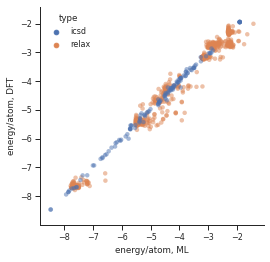

In [40]:
df = unrel_unrel[unrel_unrel.set == "test_composition"]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, aspect='equal', adjustable='datalim')

# artist = dsshow(volumes,
#        ds.Point('volume_predicted', 'volperatom'),
#        ds.count_cat('type'),       
#        cmap='Blues', norm='eq_hist', aspect='equal',
#        x_range=(0, 70), y_range=(0, 70), ax=ax)
g = sns.scatterplot(data=df, x="energyperatom", y="energy_predicted", 
                hue="type", hue_order=["icsd", "relax"],
                alpha=.5, s=20, linewidth=0,
               )

ax.set_xlabel('energy/atom, ML')
ax.set_ylabel('energy/atom, DFT')
# ax.legend(handles=artist.get_legend_elements(), fontsize=13, loc='lower right')
sns.despine()